In [2]:
import pandas as pd
import numpy as np


In [51]:
#read both data files in, occ_df as the main dataframe and ind_df for the industry labels
occ_df = pd.read_csv('C:/Users/Tanner/Downloads/usa_00002.csv.gz', compression='gzip')


In [52]:
ind_df = pd.read_csv('C:/Users/Tanner/Downloads/2017-industry-code-list.csv')

In [5]:
ind_df.head()

,Unnamed: 0,2017 Industry Code List,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,NaN,NaN,NaN,NaN
1,NaN,Industry 2017 Description,NaN,2017 Census Code,2017 NAICS Code
2,NaN,NaN,NaN,NaN,NaN
3,NaN,The 2017 census industry classification list h...,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


In [53]:
#clean the industry table by dropping columns that are not needed and dropping na rows
ind_df = ind_df.drop(columns=['Unnamed: 0', 'Unnamed: 2', 'Unnamed: 4'])

In [54]:
ind_df.head()

,2017 Industry Code List,Unnamed: 3
0,NaN,NaN
1,Industry 2017 Description,2017 Census Code
2,NaN,NaN
3,The 2017 census industry classification list h...,NaN
4,NaN,NaN


In [55]:
ind_df = ind_df.dropna()

In [56]:
#rename "Unamed: 3" column to "IND"
ind_df = ind_df.rename(columns={'Unnamed: 3': 'IND'})


In [10]:
ind_df.head()

,2017 Industry Code List,IND
1,Industry 2017 Description,2017 Census Code
7,"Agriculture, Forestry, Fishing, and Hunting",0170-0290
9,Crop production,170
10,Animal production and aquaculture,180
11,Forestry except logging,190


In [11]:
occ_df.head()

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STRATA,GQ,PERNUM,PERWT,EDUC,EDUCD,EMPSTAT,EMPSTATD,OCC,IND,WKSWORK1,UHRSWORK,INCTOT
0,2022,202201,1,2022010000031,69.0,2022000000011,280301,3,1,69.0,7,71,3,30,0,0,0,0,18800
1,2022,202201,2,2022010000111,22.0,2022000000021,200001,3,1,22.0,6,64,3,30,9645,5391,20,52,12500
2,2022,202201,3,2022010000200,45.0,2022000000031,280301,3,1,45.0,2,26,3,30,8800,1180,36,35,16400
3,2022,202201,4,2022010000261,4.0,2022000000041,110001,4,1,4.0,0,2,3,30,0,0,0,0,8600
4,2022,202201,5,2022010000296,47.0,2022000000051,150201,3,1,47.0,7,71,3,30,6230,770,10,20,5000


In [57]:
occ_df.shape

(3373378, 19)

In [ ]:
#change the industry variable to a string so future code works

In [61]:
ind_df['IND'] = ind_df['IND'].astype(str)

In [62]:
occ_df['IND'] = occ_df['IND'].astype(str)


In [58]:
#calculate the yearly salary by dividing total income by hours worked a week and weeks worked
def income_hr(inc, hrs, wk):
    if hrs == 0:
        return 0
    return inc / hrs / wk

occ_df['INC_HR'] = occ_df.apply(lambda x: income_hr(x['INCTOT'], x['UHRSWORK'], x['WKSWORK1']), axis=1)

In [59]:
occ_df.head()

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STRATA,GQ,PERNUM,PERWT,EDUC,EDUCD,EMPSTAT,EMPSTATD,OCC,IND,WKSWORK1,UHRSWORK,INCTOT,INC_HR
0,2022,202201,1,2022010000031,69.0,2022000000011,280301,3,1,69.0,7,71,3,30,0,0,0,0,18800,0.000000
1,2022,202201,2,2022010000111,22.0,2022000000021,200001,3,1,22.0,6,64,3,30,9645,5391,20,52,12500,12.019231
2,2022,202201,3,2022010000200,45.0,2022000000031,280301,3,1,45.0,2,26,3,30,8800,1180,36,35,16400,13.015873
3,2022,202201,4,2022010000261,4.0,2022000000041,110001,4,1,4.0,0,2,3,30,0,0,0,0,8600,0.000000
4,2022,202201,5,2022010000296,47.0,2022000000051,150201,3,1,47.0,7,71,3,30,6230,770,10,20,5000,25.000000


In [63]:
#merge the occ_df and ind_df column on 'IND'
merged_df = pd.merge(occ_df, ind_df, left_on='IND', right_on='IND', how='left')

In [64]:
#rename the industry name column for interpretablility
merged_df = merged_df.rename(columns={'2017 Industry Code List': 'IND_NAME'})

In [79]:
#create a dataframe of jobs median income per hour of jobs with no advanced degree
merged_edu = merged_df[merged_df['EDUC'] <= 6]
merged_edu = merged_edu[merged_df['INC_HR'] != 0]
median_edu = merged_edu.groupby('IND_NAME')['INC_HR'].median()
median_edu = median_edu.sort_values(ascending=False)
print(median_edu)

C:\Users\Tanner\AppData\Local\Temp\ipykernel_8444\4232085740.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  merged_edu = merged_edu[merged_df['INC_HR'] != 0]


IND_NAME
Electric and gas, and other combinations                                                                  38.461538
Electric power generation, transmission and distribution                                                  36.435688
Software publishers                                                                                       34.182692
Natural gas distribution                                                                                  33.653846
Pipeline transportation                                                                                   33.653846
                                                                                                            ...    
Restaurants and other food services                                                                       12.437901
Child day care services                                                                                   12.244898
Book stores and news dealers                                   

In [75]:
#filter out the people who did not work and find the industries with the highest median income
merged_ovr = merged_df[merged_df['INC_HR'] != 0]
median_ovr = merged_ovr.groupby('IND_NAME')['INC_HR'].median()
median_ovr = median_ovr.sort_values(ascending=False)
print(median_inc)

IND_NAME
Internet publishing and broadcasting and web search portals                                               66.360577
Software publishers                                                                                       52.884615
Computer systems design and related services                                                              48.076923
Securities, commodities, funds, trusts, and other financial investments                                   46.875000
Computer and peripheral equipment manufacturing                                                           46.607906
                                                                                                            ...    
Restaurants and other food services                                                                       11.655012
Book stores and news dealers                                                                              11.566742
U. S. Marines                                                  

In [90]:
# create a dataframe of the top 10 values in median inc and rename columns
top_10 = median_inc.head(5)
top_10 = top_10.reset_index()
top_10 = top_10.rename(columns={'INC_HR': 'Median Income per Hour'})
top_10 = top_10.rename(columns={'IND_NAME': 'Sub Industry'})
top_10 = top_10.sort_values(by='Median Income per Hour', ascending=True)
top_10

,Sub Industry,Median Income per Hour
4,Computer and peripheral equipment manufacturing,46.607906
3,"Securities, commodities, funds, trusts, and ot...",46.875000
2,Computer systems design and related services,48.076923
1,Software publishers,52.884615
0,Internet publishing and broadcasting and web s...,66.360577


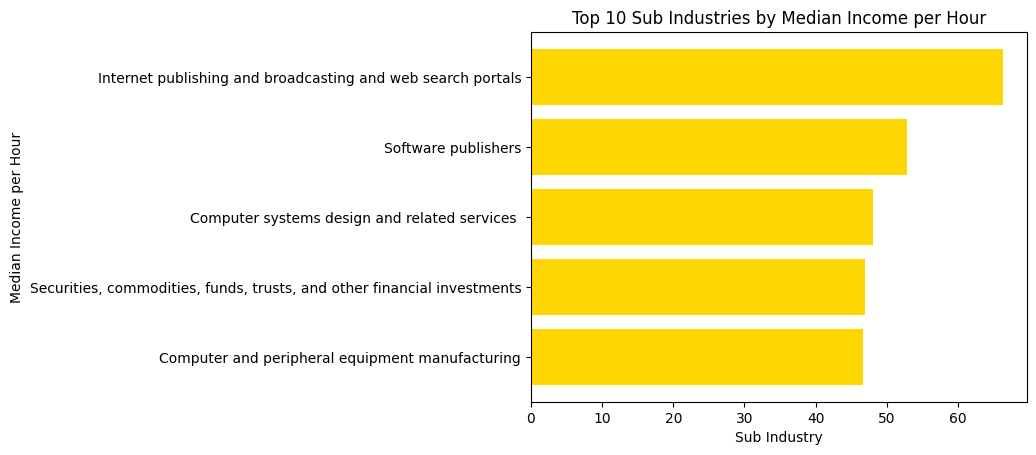

In [96]:
#create a bar plot of top_10 with matplotlib
import matplotlib.pyplot as plt

plt.barh(top_10['Sub Industry'], top_10['Median Income per Hour'], color='gold')
plt.xticks(rotation=0)
plt.xlabel('Sub Industry')
plt.ylabel('Median Income per Hour')
plt.title('Top 10 Sub Industries by Median Income per Hour')
plt.show()


In [92]:
# create a dataframe of the top 10 values in median inc for the no degree jobs
top_10_edu = median_edu.head(5)
top_10_edu = top_10_edu.reset_index()
top_10_edu = top_10_edu.rename(columns={'INC_HR': 'Median Income per Hour'})
top_10_edu = top_10_edu.rename(columns={'IND_NAME': 'Sub Industry'})
top_10_edu = top_10_edu.sort_values(by='Median Income per Hour', ascending=True)
top_10_edu

,Sub Industry,Median Income per Hour
3,Natural gas distribution,33.653846
4,Pipeline transportation,33.653846
2,Software publishers,34.182692
1,"Electric power generation, transmission and di...",36.435688
0,"Electric and gas, and other combinations",38.461538


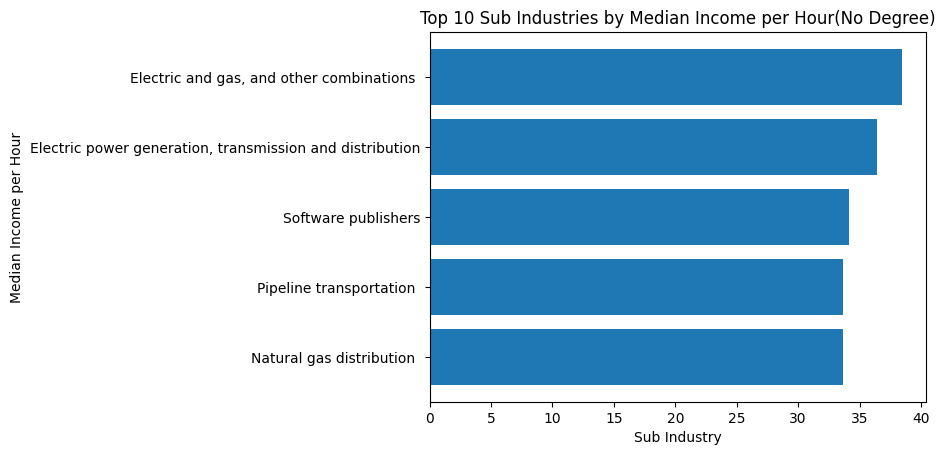

In [93]:
#create a bar plot of top_10_edu with matplotlib
import matplotlib.pyplot as plt

plt.barh(top_10_edu['Sub Industry'], top_10_edu['Median Income per Hour'])
plt.xticks(rotation=0)
plt.xlabel('Sub Industry')
plt.ylabel('Median Income per Hour')
plt.title('Top 10 Sub Industries by Median Income per Hour(No Degree)')
plt.show()